## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()
"""
Compile 模型
"""
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 7s 135us/step - loss: 2.0613 - acc: 0.2667 - val_loss: 1.9309 - val_acc: 0.3181
Epoch 2/500
50000/50000 [==============================] - 6s 121us/step - loss: 1.8815 - acc: 0.3364 - val_loss: 1.8583 - val_acc: 0.3352
Epoch 3/500
50000/50000 [==============================] - 6s 126us/step - loss: 1.8157 - acc: 0.3607 - val_loss: 1.8048 - val_acc: 0.3573
Epoch 4/500
50000/50000 [==============================] - 6s 128us/step - loss: 1.7681 - acc: 0.3800 - val_loss: 1.8209 - val_acc: 0.3465
Epoch 5/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.7327 - acc: 0.3926 - val_loss: 1.7475 - val_acc: 0.3864
Epoch 6/500
50000/50000 [==============================] - 7s 133us/step - loss: 1.6996 - acc: 0.4042 - val_loss: 1.6845 - val_acc: 0.4096
Epoch 7/500
50000/50000 [==============================] - 7s 145us/

50000/50000 [==============================] - 7s 133us/step - loss: 0.7732 - acc: 0.7325 - val_loss: 1.5296 - val_acc: 0.5122
Epoch 138/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.7582 - acc: 0.7403 - val_loss: 1.6379 - val_acc: 0.4933
Epoch 139/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.7582 - acc: 0.7386 - val_loss: 1.4437 - val_acc: 0.5352
Epoch 140/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.7470 - acc: 0.7428 - val_loss: 1.6543 - val_acc: 0.4976
Epoch 141/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.7675 - acc: 0.7360 - val_loss: 1.5111 - val_acc: 0.5077
Epoch 142/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.7447 - acc: 0.7454 - val_loss: 1.4572 - val_acc: 0.5255
Epoch 143/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.7383 - acc: 0.7454 - val_loss: 1.5509 - val_acc: 0.5069
Epoch 144/500
50000/50000 [

Epoch 253/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.2351 - acc: 0.9312 - val_loss: 2.2142 - val_acc: 0.5124
Epoch 254/500
50000/50000 [==============================] - 7s 136us/step - loss: 0.2483 - acc: 0.9244 - val_loss: 2.3502 - val_acc: 0.5040
Epoch 255/500
50000/50000 [==============================] - 7s 146us/step - loss: 0.2633 - acc: 0.9268 - val_loss: 2.2922 - val_acc: 0.5096
Epoch 256/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2860 - acc: 0.9179 - val_loss: 2.0641 - val_acc: 0.5176
Epoch 257/500
50000/50000 [==============================] - 7s 132us/step - loss: 0.2730 - acc: 0.9225 - val_loss: 1.9976 - val_acc: 0.5361
Epoch 258/500
50000/50000 [==============================] - 7s 133us/step - loss: 0.2284 - acc: 0.9358 - val_loss: 1.9835 - val_acc: 0.5367
Epoch 259/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.2180 - acc: 0.9375 - val_loss: 2.1213 - val_acc: 0.5093
Epoch 260/500

In [7]:
model.fit(x_train, y_train, 
          epochs=200, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.6853 - acc: 0.4063 - val_loss: 1.7169 - val_acc: 0.3945
Epoch 2/200
50000/50000 [==============================] - 6s 117us/step - loss: 1.6612 - acc: 0.4192 - val_loss: 1.7184 - val_acc: 0.3950
Epoch 3/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.6365 - acc: 0.4270 - val_loss: 1.7238 - val_acc: 0.3909
Epoch 4/200
50000/50000 [==============================] - 6s 118us/step - loss: 1.6202 - acc: 0.4328 - val_loss: 1.7170 - val_acc: 0.4038
Epoch 5/200
50000/50000 [==============================] - 6s 120us/step - loss: 1.6013 - acc: 0.4386 - val_loss: 1.6098 - val_acc: 0.4363
Epoch 6/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.5842 - acc: 0.4458 - val_loss: 1.6773 - val_acc: 0.4006
Epoch 7/200
50000/50000 [==============================] - 6s 119us/step - loss: 1.5666 - acc: 0.4497 - val_loss: 1.

50000/50000 [==============================] - 7s 131us/step - loss: 1.1529 - acc: 0.5961 - val_loss: 1.4655 - val_acc: 0.4840
Epoch 60/200
50000/50000 [==============================] - 7s 133us/step - loss: 1.1429 - acc: 0.6017 - val_loss: 1.4421 - val_acc: 0.4920
Epoch 61/200
50000/50000 [==============================] - 7s 134us/step - loss: 1.1363 - acc: 0.6037 - val_loss: 1.3772 - val_acc: 0.5118
Epoch 62/200
50000/50000 [==============================] - 7s 134us/step - loss: 1.1270 - acc: 0.6043 - val_loss: 1.5097 - val_acc: 0.4845
Epoch 63/200
50000/50000 [==============================] - 7s 136us/step - loss: 1.1219 - acc: 0.6081 - val_loss: 1.4808 - val_acc: 0.4744
Epoch 64/200
50000/50000 [==============================] - 7s 137us/step - loss: 1.1230 - acc: 0.6078 - val_loss: 1.4832 - val_acc: 0.4924
Epoch 65/200
50000/50000 [==============================] - 7s 139us/step - loss: 1.1171 - acc: 0.6076 - val_loss: 1.4029 - val_acc: 0.5025
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 7s 145us/step - loss: 0.8369 - acc: 0.7108 - val_loss: 1.4881 - val_acc: 0.5184
Epoch 118/200
50000/50000 [==============================] - 7s 146us/step - loss: 0.8363 - acc: 0.7107 - val_loss: 1.4356 - val_acc: 0.5186
Epoch 119/200
50000/50000 [==============================] - 7s 144us/step - loss: 0.8347 - acc: 0.7089 - val_loss: 1.3752 - val_acc: 0.5399
Epoch 120/200
50000/50000 [==============================] - 7s 143us/step - loss: 0.8253 - acc: 0.7139 - val_loss: 1.6846 - val_acc: 0.4745
Epoch 121/200
50000/50000 [==============================] - 7s 139us/step - loss: 0.8238 - acc: 0.7159 - val_loss: 1.6895 - val_acc: 0.4738
Epoch 122/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.8190 - acc: 0.7177 - val_loss: 1.4883 - val_acc: 0.5133
Epoch 123/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.8089 - acc: 0.7214 - val_loss: 1.5603 - val_acc: 0.4880
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 7s 143us/step - loss: 0.5625 - acc: 0.8110 - val_loss: 1.5600 - val_acc: 0.5317
Epoch 176/200
50000/50000 [==============================] - 8s 151us/step - loss: 0.5683 - acc: 0.8082 - val_loss: 1.5126 - val_acc: 0.5466
Epoch 177/200
50000/50000 [==============================] - 7s 141us/step - loss: 0.5585 - acc: 0.8117 - val_loss: 2.0711 - val_acc: 0.4516
Epoch 178/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.5607 - acc: 0.8095 - val_loss: 1.6209 - val_acc: 0.5317
Epoch 179/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.5539 - acc: 0.8131 - val_loss: 1.6064 - val_acc: 0.5302
Epoch 180/200
50000/50000 [==============================] - 6s 129us/step - loss: 0.5330 - acc: 0.8220 - val_loss: 1.8751 - val_acc: 0.4885
Epoch 181/200
50000/50000 [==============================] - 7s 132us/step - loss: 0.5352 - acc: 0.8185 - val_loss: 1.6032 - val_acc: 0.5292
Epoch 182/200
50000/50000 [

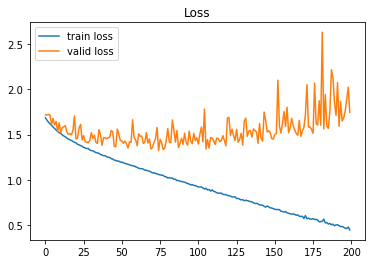

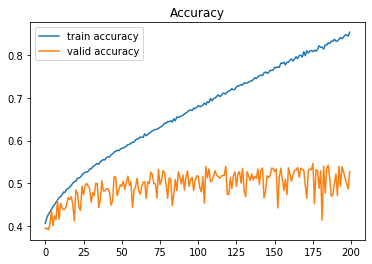

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()